# Capture Signal

In [ ]:
import serial

import matplotlib.pyplot as plt

import time

serial_data = serial.Serial("/dev/ttyACM1", 9600)

serial_list = []


def capture_signal():
    # time in seconds to capture the ecg signal
    capture_time = 5

    t_end = time.time() + capture_time
    while time.time() < t_end:
        while serial_data.inWaiting() == 0:
            pass
        temp_string = serial_data.readline()
        serial_string = (
            str(temp_string)
            .replace("b", "")
            .replace("'", "")
            .replace("\\r", "")
            .replace("\\n", "")
        )
        if len(serial_string) == 3:
            serial_list.append(int(serial_string))


def output_signal_to_csv():
    with open("presentation_ecg.csv", "w") as ecg_file:
        ecg_file.write("voltage,\n")
        for item in serial_list:
            ecg_file.write("%s,\n" % item)
        ecg_file.write("0,")

time.sleep(2)
capture_signal()
output_signal_to_csv()


# Filter Signal

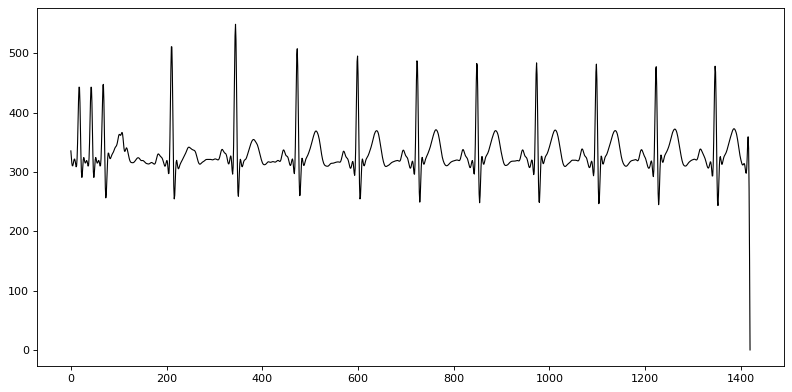

In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor="w", edgecolor="k")

b, a = signal.butter(4, 0.25, analog=False)

data = pd.read_csv("project_presentation.csv")
sig = data["voltage"]

sig_ff = signal.filtfilt(b, a, sig)

plt.plot(sig_ff, color="#000000", linewidth=1)
# plt.axis('off')

plt.savefig("project_presentation.png", dpi=150, quality=100, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Finding R Peaks

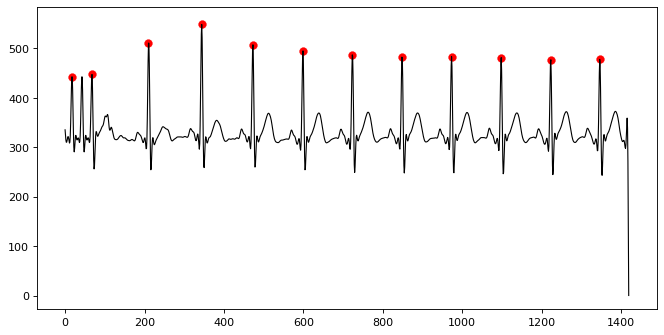

In [3]:
import numpy as np                    
import matplotlib.pyplot as plt 
from scipy.signal import argrelextrema

# data = pd.read_csv("project_presentation.csv")

# data = data[400:-100]


no_of_rows = data.shape[0]

# voltage = data["voltage"]
line_numbers = []

for i in range(0, no_of_rows):
    line_numbers.append(i)
    
ecg_plot = np.concatenate((sig_ff, line_numbers))

c_max_index = argrelextrema(ecg_plot, np.greater, order=45)

# print (c_max_index)

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor="w", edgecolor="k")
plt.plot(sig_ff, color="#000000", linewidth=1)


plt.scatter(c_max_index[0],ecg_plot[c_max_index[0]],linewidth=0.3, s=50, c='r')

In [2]:
# voltage = data["voltage"]
no_of_rows = sig_ff.shape[0]
line_numbers = []
theVoltage = []
threshold = 400
start = 400
end = -100

for i in range(0, no_of_rows):
#     print (voltage[i])
#     squaredValue = voltage[i] * voltage[i]
    if sig_ff[i] > threshold:
        theVoltage.append(sig_ff[i])
    else:
        theVoltage.append(0)
    line_numbers.append(i)    
    
ecg_plot = np.concatenate((theVoltage[start:end], line_numbers[start:end]))

r_peaks = argrelextrema(ecg_plot, np.greater, order=5)

# print (c_max_index)

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor="w", edgecolor="k")
plt.plot(theVoltage[start:end], color="#000000", linewidth=1)

plt.scatter(r_peaks[0],ecg_plot[c_max_index[0]],linewidth=0.3, s=500, c='r')

NameError: name 'argrelextrema' is not defined

In [51]:
c_max_index

(array([ 73, 199, 323, 448, 573, 698, 823]),)

# Segment signal

In [81]:
r_peaks_list  = str(r_peaks)

r_peaks_list = r_peaks_list.split() #split string into a list
del r_peaks_list[0] # first element is a string and of no use
# testdata.remove('(array([')
r_peaks_list[-1] = (r_peaks_list[-1].replace(']),)', ',')) # last element has a string at end

for i in range(0, len(r_peaks_list)):
    r_peaks_list[i] = (r_peaks_list[i].replace(',',''))
    r_peaks_list[i] = int(r_peaks_list[i])

# c_max_list = list(c_max_index)
# segment_start = c_max_index[0]
# segment_end = c_max_index[1]

r_peaks_list

# type(testdata)

[73, 199, 323, 448, 573, 698, 823]

In [ ]:
import numpy as np
import cv2 as cv
              
    
def find_peaks(peaks_list, y, x):
    for y_cors in range (y,image_y):
        for x_cors in range (x, image_x):
            if img[y_cors, x_cors] == 0:
                x = x_cors + 200
                if {y_cors, x_cors} not in peaks_list:
                    peaks_list.append({y_cors, x_cors})
                print(peaks_list)
                return x
    return x


img = cv.imread('project_presentation.png', 0)
image_x = (img.shape[1])
image_y = (img.shape[0])
x = 0
y = 0
peaks_list = []
keep_looping = True

while keep_looping:
    if x < image_x:
        x = (find_peaks(peaks_list, y, x))
    else:
        keep_looping = False

cv.imshow('image', img)
cv.waitKey(0) & 0xFF
cv.destroyAllWindows()

[{378, 39}]
[{378, 39}, {97, 660}]
[{378, 39}, {97, 660}, {939, 103}]
[{378, 39}, {97, 660}, {939, 103}, {1153, 205}]


In [30]:
type(voltage)

pandas.core.series.Series

In [31]:
voltage

1       327
2       311
3       307
4       310
5       316
       ... 
1315    337
1316    335
1317    337
1318    337
1319    333
Name: voltage, Length: 1319, dtype: int64

In [19]:
import csv
import time
import serial

x_value = 0
total_1 = 1000
total_2 = 1000

fieldnames = ["x_value", "total_1"]

with open('data.csv', 'w') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

while True:

    with open('data.csv', 'a') as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        info = {
            "x_value": x_value,
            "total_1": total_1,
        }

        csv_writer.writerow(info)

        x_value += 1
#         total_1 = total_1 + random.randint(-6, 8)
        while serial_data.inWaiting() == 0:
            pass
        temp_string = serial_data.readline()
        serial_string = (
            str(temp_string)
            .replace("b", "")
            .replace("'", "")
            .replace("\\r", "")
            .replace("\\n", "")
        )
        if len(serial_string) == 3:
            total_1 = serial_string

KeyboardInterrupt: 

In [ ]:

import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count()


def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
#     y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
#     plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()